In [5]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
# csv_path1 = "Player Historical Trade Tweets/MarshawnLynch_Trans_1.csv"
# csv_path2 = "Player Historical Trade Tweets/MarshawnLynch_Trans_2.csv"
csv_path3 = "Player Historical Trade Tweets/MarshawnLynch_Trans_3.csv"
csv_path4 = "Player Historical Trade Tweets/MarshawnLynch_Trans_4.csv"
# csv_path5 = "Player Tweets/Kenny Britt_Trans 5.csv"
# csv_path6 = "Player Tweets/Kenny Britt_Trans 6.csv"

#Establish pd dataframe for each file
# marshawnlynch1 = pd.read_csv(csv_path1, sep=";")
# marshawnlynch2 = pd.read_csv(csv_path2, sep=";")
marshawnlynch3 = pd.read_csv(csv_path3, sep=";")
marshawnlynch4 = pd.read_csv(csv_path4, sep=";")
# kennybritt1 = pd.read_csv(csv_path5, sep=";")
# kennybritt1 = pd.read_csv(csv_path6, sep=";")

#concatenate data frames *kennybritt4* not working
marshawnlynch_master = pd.concat([marshawnlynch3, marshawnlynch4])
marshawnlynch_master

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2010-10-11 18:36,0,0,http://euraeka.com/articles/7754619-Seahawks-t...,NaN,NaN,# # # # #,2.707955e+10,https://twitter.com/the_world_news/status/2707...
1,NaN,2010-10-11 18:13,0,0,Marshawn Lynch; welcome to Seattle!! Maybe we ...,NaN,NaN,NaN,2.707770e+10,https://twitter.com/DebraB78/status/27077701682
2,NaN,2010-10-11 16:16,0,0,I Miss Marshawn Lynch ahahah the bills aren't ...,NaN,NaN,NaN,2.706950e+10,https://twitter.com/Lovebuffalo2331/status/270...
3,NaN,2010-10-11 16:07,0,0,"Marshawn Lynch's legs feel heavy, smile looks ...",NaN,NaN,NaN,2.706889e+10,https://twitter.com/Callaway4/status/27068893843
4,NaN,2010-10-11 16:05,0,0,Madden 08 Marshawn Lynch Touchdown: Author: Bl...,NaN,NaN,NaN,2.706876e+10,https://twitter.com/Marshawn_Lynch/status/2706...
5,NaN,2010-10-11 15:55,0,0,RB Marshawn Lynch Becomes Latest Buffalo Draft...,NaN,NaN,#,2.706812e+10,https://twitter.com/BillsBackers/status/270681...
6,NaN,2010-10-11 15:55,0,0,RB Marshawn Lynch Becomes Latest Buffalo Draft...,NaN,NaN,NaN,2.706812e+10,https://twitter.com/top_bills982/status/270681...
7,NaN,2010-10-11 15:54,0,0,Marshawn Lynch no question RT @ jennihogan: Ra...,NaN,@,NaN,2.706801e+10,https://twitter.com/gabegs/status/27068014307
8,NaN,2010-10-11 15:37,0,0,RB Marshawn Lynch Becomes Latest Buffalo Draft...,NaN,NaN,NaN,2.706691e+10,https://twitter.com/BILLSpeeps/status/27066905682
9,NaN,2010-10-11 15:23,0,0,Marshawn Lynch on a bitchhhh,NaN,NaN,NaN,2.706598e+10,https://twitter.com/LeeshPayowww/status/270659...


In [6]:
#fillna's with text to fix error
marshawnlynch_master["text"].fillna("text", inplace=True)
marshawnlynch_master.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2010-10-11 18:36,0,0,http://euraeka.com/articles/7754619-Seahawks-t...,NaN,NaN,# # # # #,2.707955e+10,https://twitter.com/the_world_news/status/2707...
1,NaN,2010-10-11 18:13,0,0,Marshawn Lynch; welcome to Seattle!! Maybe we ...,NaN,NaN,NaN,2.707770e+10,https://twitter.com/DebraB78/status/27077701682
2,NaN,2010-10-11 16:16,0,0,I Miss Marshawn Lynch ahahah the bills aren't ...,NaN,NaN,NaN,2.706950e+10,https://twitter.com/Lovebuffalo2331/status/270...
3,NaN,2010-10-11 16:07,0,0,"Marshawn Lynch's legs feel heavy, smile looks ...",NaN,NaN,NaN,2.706889e+10,https://twitter.com/Callaway4/status/27068893843
4,NaN,2010-10-11 16:05,0,0,Madden 08 Marshawn Lynch Touchdown: Author: Bl...,NaN,NaN,NaN,2.706876e+10,https://twitter.com/Marshawn_Lynch/status/2706...


In [7]:
#create list of sentiment scores associated with tweets about relevant player

marshawnlynch_sent = []

tweets = marshawnlynch_master["text"]

for index,tweet in marshawnlynch_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    marshawnlynch_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
marshawnlynch_sent



[{'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2010-10-11 18:36'},
 {'Compound': 0.555,
  'Negative': 0.826,
  'Neutral': 0.0,
  'Positive': 0.174,
  'date': '2010-10-11 18:13'},
 {'Compound': -0.2263,
  'Negative': 0.643,
  'Neutral': 0.237,
  'Positive': 0.12,
  'date': '2010-10-11 16:16'},
 {'Compound': 0.6597,
  'Negative': 0.769,
  'Neutral': 0.0,
  'Positive': 0.231,
  'date': '2010-10-11 16:07'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2010-10-11 16:05'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2010-10-11 15:55'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2010-10-11 15:55'},
 {'Compound': 0.4588,
  'Negative': 0.701,
  'Neutral': 0.103,
  'Positive': 0.196,
  'date': '2010-10-11 15:54'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2010-10-11 15:37'},
 {'Compound': 0

In [8]:
# Convert player sentiments to DataFrame
ML_pd = pd.DataFrame.from_dict(marshawnlynch_sent)
ML_pd.head()

,Compound,Negative,Neutral,Positive,date
0,0.0000,1.000,0.000,0.000,2010-10-11 18:36
1,0.5550,0.826,0.000,0.174,2010-10-11 18:13
2,-0.2263,0.643,0.237,0.120,2010-10-11 16:16
3,0.6597,0.769,0.000,0.231,2010-10-11 16:07
4,0.0000,1.000,0.000,0.000,2010-10-11 16:05


In [9]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(marshawnlynch_master, ML_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2010-10-11 18:36,0,0,http://euraeka.com/articles/7754619-Seahawks-t...,NaN,NaN,# # # # #,2.707955e+10,https://twitter.com/the_world_news/status/2707...,0.0000,1.000,0.000,0.000
1,NaN,2010-10-11 18:13,0,0,Marshawn Lynch; welcome to Seattle!! Maybe we ...,NaN,NaN,NaN,2.707770e+10,https://twitter.com/DebraB78/status/27077701682,0.5550,0.826,0.000,0.174
2,NaN,2010-10-11 16:16,0,0,I Miss Marshawn Lynch ahahah the bills aren't ...,NaN,NaN,NaN,2.706950e+10,https://twitter.com/Lovebuffalo2331/status/270...,-0.2263,0.643,0.237,0.120
3,NaN,2010-10-11 16:07,0,0,"Marshawn Lynch's legs feel heavy, smile looks ...",NaN,NaN,NaN,2.706889e+10,https://twitter.com/Callaway4/status/27068893843,0.6597,0.769,0.000,0.231
4,NaN,2010-10-11 16:05,0,0,Madden 08 Marshawn Lynch Touchdown: Author: Bl...,NaN,NaN,NaN,2.706876e+10,https://twitter.com/Marshawn_Lynch/status/2706...,0.0000,1.000,0.000,0.000


In [10]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2010-10-11 18:36,0,0,http://euraeka.com/articles/7754619-Seahawks-t...,NaN,NaN,# # # # #,2.707955e+10,https://twitter.com/the_world_news/status/2707...,0.0000,1.000,0.000,0.000,2010-10-11
1,NaN,2010-10-11 18:13,0,0,Marshawn Lynch; welcome to Seattle!! Maybe we ...,NaN,NaN,NaN,2.707770e+10,https://twitter.com/DebraB78/status/27077701682,0.5550,0.826,0.000,0.174,2010-10-11
2,NaN,2010-10-11 16:16,0,0,I Miss Marshawn Lynch ahahah the bills aren't ...,NaN,NaN,NaN,2.706950e+10,https://twitter.com/Lovebuffalo2331/status/270...,-0.2263,0.643,0.237,0.120,2010-10-11
3,NaN,2010-10-11 16:07,0,0,"Marshawn Lynch's legs feel heavy, smile looks ...",NaN,NaN,NaN,2.706889e+10,https://twitter.com/Callaway4/status/27068893843,0.6597,0.769,0.000,0.231,2010-10-11
4,NaN,2010-10-11 16:05,0,0,Madden 08 Marshawn Lynch Touchdown: Author: Bl...,NaN,NaN,NaN,2.706876e+10,https://twitter.com/Marshawn_Lynch/status/2706...,0.0000,1.000,0.000,0.000,2010-10-11


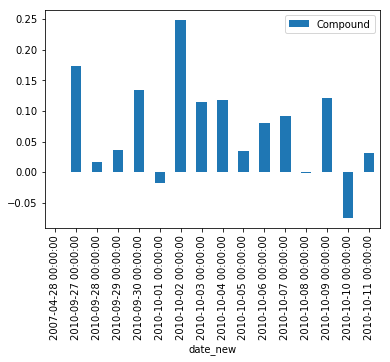

In [11]:
#plot groupby *x axis = day, y axis = compound sentiment score*
grouped = merged.groupby(['date_new'])
grouped.mean().reset_index().plot.bar("date_new", "Compound")
plt.savefig('marshawnlynch.png')
plt.show()
